<a href="https://colab.research.google.com/github/morteza80mr/DeepLearning2024/blob/main/Mini%20Project%201/McCulloch_Pitts_Triangle_Classification_with_Multiple_Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualizing a Triangle with McCulloch-Pitts Neurons: Step Activation and Point Classification


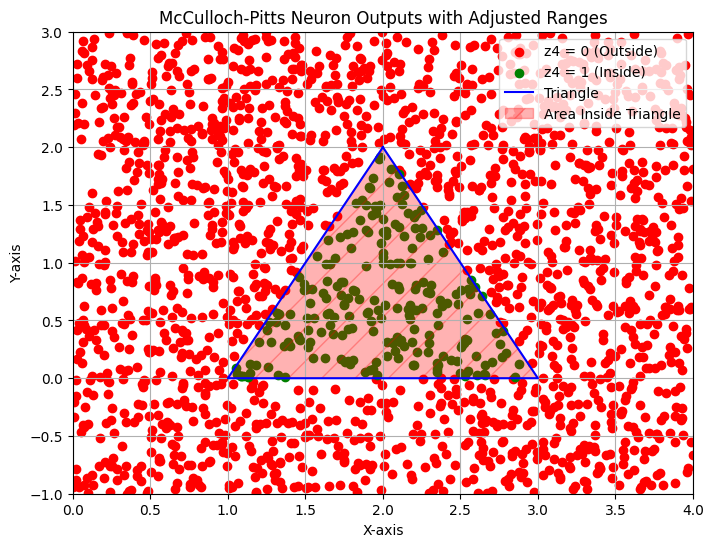

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Triangle vertices
A = (2,2)
B = (3,0)
C = (1,0)

class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold, activation_type='step'):
        self.weights = np.array(weights)
        self.threshold = threshold
        self.activation_type = activation_type

    def model(self, x):
        net = np.dot(self.weights, x)
        # For this demonstration, just use the standard step
        if self.activation_type == 'step':
            return 1 if net >= self.threshold else 0
        # Default to step if something else is chosen without implementation
        return 1 if net >= self.threshold else 0

# Define neurons for each inequality with standard step activation
# Conditions:
# y >= 0 => w=[0,1], θ=0
neur1 = McCulloch_Pitts_neuron([0,1], 0, activation_type='step')

# y <= -2x+6 => -2x - y +6>=0 => w=[-2,-1], θ=-6
neur2 = McCulloch_Pitts_neuron([-2,-1], -6, activation_type='step')

# y <= 2x-2 => 2x - y -2>=0 => w=[2,-1], θ=2
neur3 = McCulloch_Pitts_neuron([2,-1], 2, activation_type='step')

# Final neuron to AND all three conditions
# We want: z4=1 if z1=z2=z3=1. Using w=[1,1,1], θ=2.5
neur_final = McCulloch_Pitts_neuron([1,1,1], 2.5, activation_type='step')

def inside_triangle(x, y):
    z1 = neur1.model([x,y])
    z2 = neur2.model([x,y])
    z3 = neur3.model([x,y])
    z4 = neur_final.model([z1,z2,z3])
    return z4

# Generate points in the requested ranges
num_points = 2000
x_values = np.random.uniform(0,4,num_points)    # X range: (0,4)
y_values = np.random.uniform(-1,3,num_points)   # Y range: (-1,3)

inside_x = []
inside_y = []
outside_x = []
outside_y = []

for i in range(num_points):
    z = inside_triangle(x_values[i], y_values[i])
    if z == 1:
        inside_x.append(x_values[i])
        inside_y.append(y_values[i])
    else:
        outside_x.append(x_values[i])
        outside_y.append(y_values[i])

plt.figure(figsize=(8,6))
plt.scatter(outside_x, outside_y, color='red', label='z4 = 0 (Outside)')
plt.scatter(inside_x, inside_y, color='green', label='z4 = 1 (Inside)')

# Plot the triangle
triangle_x = [A[0], B[0], C[0], A[0]]
triangle_y = [A[1], B[1], C[1], A[1]]
plt.plot(triangle_x, triangle_y, color='blue', label='Triangle')
plt.fill([A[0],B[0],C[0]], [A[1],B[1],C[1]], color='red', alpha=0.3, hatch='/', label='Area Inside Triangle')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('McCulloch-Pitts Neuron Outputs with Adjusted Ranges')
plt.grid(True)

# Update the axis limits
plt.xlim(0,4)
plt.ylim(-1,3)

plt.legend(loc='upper right')
plt.show()

#Flexible McCulloch-Pitts Neuron Implementations: Advanced Activation Functions and Geometric Classification

In [2]:
# Triangle vertices
A = (2,2)
B = (3,0)
C = (1,0)

class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold, activation_type='step',
                 lower_bound=None, upper_bound=None, inhibitory_indices=None):
        """
        activation_type: 'step', 'sign', 'threshold_variation', 'inhibitory', 'piecewise'
        lower_bound, upper_bound: for piecewise thresholding (range [L,U])
        inhibitory_indices: indices of inputs that if active => output forced to 0
        """
        self.weights = np.array(weights)
        self.threshold = threshold
        self.activation_type = activation_type
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.inhibitory_indices = inhibitory_indices if inhibitory_indices else []

    def model(self, x):
        net = np.dot(self.weights, x)

        # Inhibitory check
        if self.activation_type == 'inhibitory' and self.inhibitory_indices:
            for idx in self.inhibitory_indices:
                # If that input is "1" (active), output=0 immediately
                if x[idx] == 1:
                    return 0

        # Apply activation
        if self.activation_type == 'step':
            # Standard step function
            return 1 if net >= self.threshold else 0

        elif self.activation_type == 'sign':
            # Sign function: +1 if net>=θ, else -1
            return 1 if net >= self.threshold else -1

        elif self.activation_type == 'threshold_variation':
            # Just like step, but we highlight that we can shift threshold to tweak boundary
            return 1 if net >= self.threshold else 0

        elif self.activation_type == 'piecewise':
            # Only fire if lower_bound ≤ net ≤ upper_bound
            if self.lower_bound is not None and self.upper_bound is not None:
                return 1 if (net >= self.lower_bound and net <= self.upper_bound) else 0
            else:
                # If not well-defined, fall back to step
                return 1 if net >= self.threshold else 0

        # Default (if none of the above match)
        return 1 if net >= self.threshold else 0

def generate_points(num_points=2000, x_range=(0,4), y_range=(-1,3)):
    x_values = np.random.uniform(x_range[0], x_range[1], num_points)
    y_values = np.random.uniform(y_range[0], y_range[1], num_points)
    return x_values, y_values

def plot_results(x_values, y_values, inside_indices, scenario_title):
    inside_x = x_values[inside_indices]
    inside_y = y_values[inside_indices]
    outside_x = np.delete(x_values, inside_indices)
    outside_y = np.delete(y_values, inside_indices)

    plt.figure(figsize=(8,6))
    plt.scatter(outside_x, outside_y, color='red', label='Outside')
    plt.scatter(inside_x, inside_y, color='green', label='Inside')
    # Plot the triangle
    triangle_x = [A[0], B[0], C[0], A[0]]
    triangle_y = [A[1], B[1], C[1], A[1]]
    plt.plot(triangle_x, triangle_y, color='blue', label='Triangle')
    plt.fill([A[0],B[0],C[0]], [A[1],B[1],C[1]], color='red', alpha=0.3, hatch='/', label='Area Inside')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(scenario_title)
    plt.grid(True)
    plt.xlim(0,4)
    plt.ylim(-1,3)
    plt.legend(loc='upper right')
    plt.show()

# Scenario 1: Standard Step (Heaviside) Activation

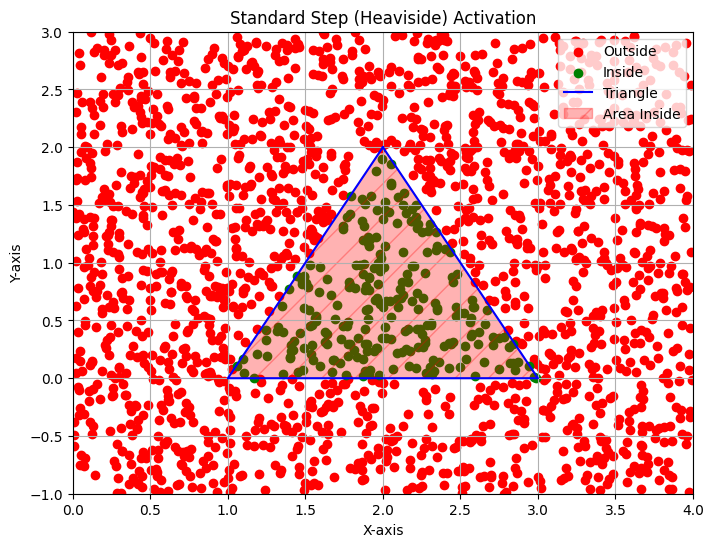

In [3]:
def inside_triangle_step(x, y):
    # Define individual inequalities as neurons with step activation
    neur1 = McCulloch_Pitts_neuron([0,1], 0, activation_type='step')       # y≥0
    neur2 = McCulloch_Pitts_neuron([-2,-1], -6, activation_type='step')    # y ≤ -2x+6
    neur3 = McCulloch_Pitts_neuron([2,-1], 2, activation_type='step')      # y ≤ 2x-2
    neur_final = McCulloch_Pitts_neuron([1,1,1], 2.5, activation_type='step') # AND all three
    z1 = neur1.model([x,y])
    z2 = neur2.model([x,y])
    z3 = neur3.model([x,y])
    return neur_final.model([z1,z2,z3])

# Example run for step activation
x_values, y_values = generate_points()
inside_indices = []
for i in range(len(x_values)):
    if inside_triangle_step(x_values[i], y_values[i]) == 1:
        inside_indices.append(i)
plot_results(x_values, y_values, inside_indices, "Standard Step (Heaviside) Activation")

# Scenario 2: Sign Function (±1) Activation

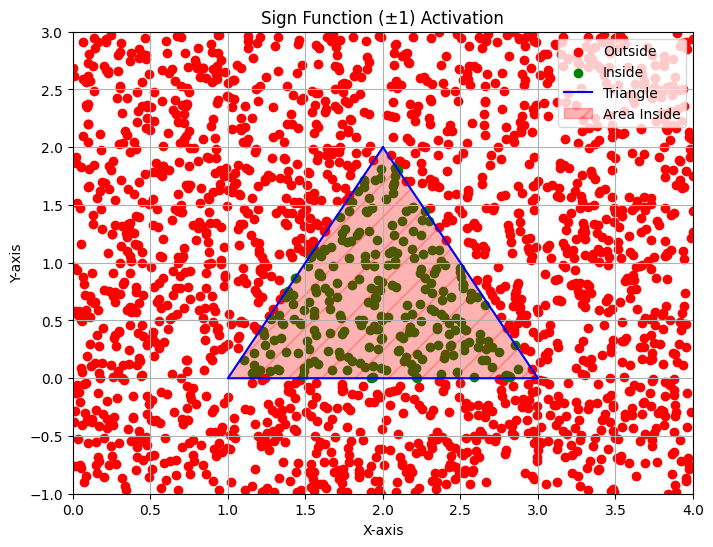

In [4]:
def inside_triangle_sign(x,y):
    # With sign activation, each inequality neuron outputs ±1
    # We must adjust the final neuron logic:
    # If all three are +1, final sum=3≥2.5 => +1 else -1
    neur1 = McCulloch_Pitts_neuron([0,1], 0, activation_type='sign')
    neur2 = McCulloch_Pitts_neuron([-2,-1], -6, activation_type='sign')
    neur3 = McCulloch_Pitts_neuron([2,-1], 2, activation_type='sign')
    neur_final = McCulloch_Pitts_neuron([1,1,1], 2.5, activation_type='sign')
    z1 = neur1.model([x,y])
    z2 = neur2.model([x,y])
    z3 = neur3.model([x,y])
    return neur_final.model([z1,z2,z3])  # +1 = inside, -1 = outside

# Example run for sign activation
x_values, y_values = generate_points()
inside_indices = []
for i in range(len(x_values)):
    if inside_triangle_sign(x_values[i], y_values[i]) == 1: # inside = +1
        inside_indices.append(i)
plot_results(x_values, y_values, inside_indices, "Sign Function (±1) Activation")

# Scenario 3: Threshold Variation

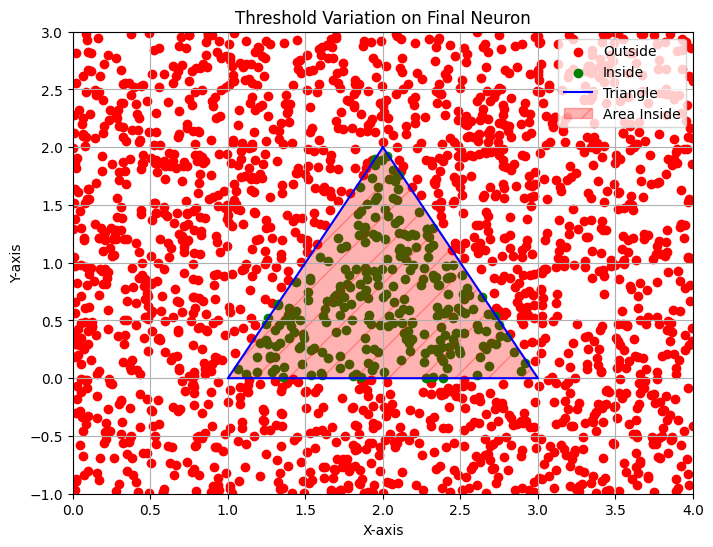

In [5]:
def inside_triangle_threshold_variation(x,y):
    # Just like step, but we can choose a different threshold for the final neuron
    # For example, let's make the final neuron more strict: θ=2.9
    neur1 = McCulloch_Pitts_neuron([0,1], 0, activation_type='threshold_variation')
    neur2 = McCulloch_Pitts_neuron([-2,-1], -6, activation_type='threshold_variation')
    neur3 = McCulloch_Pitts_neuron([2,-1], 2, activation_type='threshold_variation')
    neur_final = McCulloch_Pitts_neuron([1,1,1], 2.9, activation_type='threshold_variation')
    z1 = neur1.model([x,y])
    z2 = neur2.model([x,y])
    z3 = neur3.model([x,y])
    return neur_final.model([z1,z2,z3])

# Example run for threshold variation
x_values, y_values = generate_points()
inside_indices = []
for i in range(len(x_values)):
    if inside_triangle_threshold_variation(x_values[i], y_values[i]) == 1:
        inside_indices.append(i)
plot_results(x_values, y_values, inside_indices, "Threshold Variation on Final Neuron")

# Scenario 4: Inhibitory Inputs

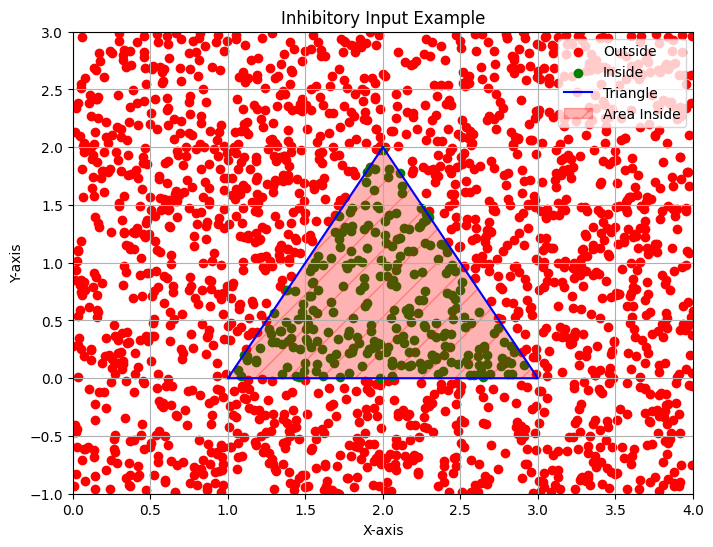

In [6]:
def inside_triangle_inhibitory(x,y):
    # Suppose we add an inhibitory condition: if x<1 (just a random condition),
    # we force output=0. We'll create an inhibitory input that is 1 if x<1.
    inhibitory_flag = 1 if x<1 else 0

    neur1 = McCulloch_Pitts_neuron([0,1], 0, activation_type='inhibitory')
    neur2 = McCulloch_Pitts_neuron([-2,-1], -6, activation_type='inhibitory')
    neur3 = McCulloch_Pitts_neuron([2,-1], 2, activation_type='inhibitory')
    # Final neuron includes the inhibitory input at index 3
    # If inhibitory_flag=1, output forced to 0
    neur_final = McCulloch_Pitts_neuron([1,1,1,0], 2.5, activation_type='inhibitory', inhibitory_indices=[3])

    z1 = neur1.model([x,y])
    z2 = neur2.model([x,y])
    z3 = neur3.model([x,y])
    return neur_final.model([z1,z2,z3,inhibitory_flag])

# Example run for inhibitory activation
x_values, y_values = generate_points()
inside_indices = []
for i in range(len(x_values)):
    if inside_triangle_inhibitory(x_values[i], y_values[i]) == 1:
        inside_indices.append(i)
plot_results(x_values, y_values, inside_indices, "Inhibitory Input Example")

# Scenario 5: Piecewise Thresholding

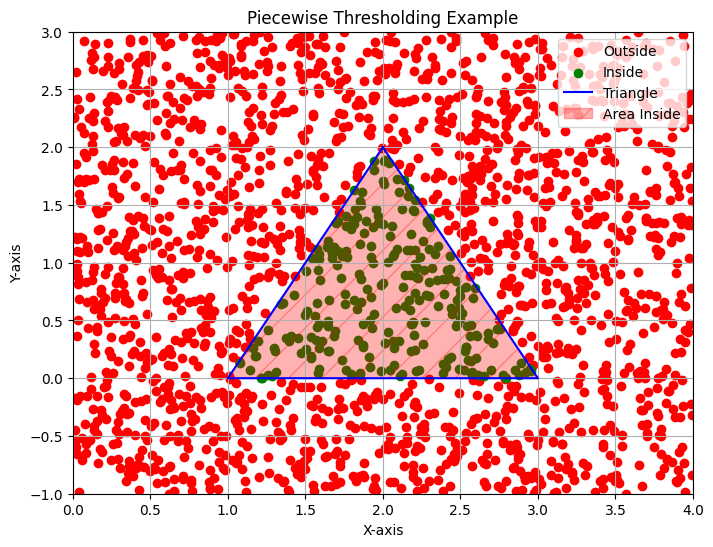

In [7]:
def inside_triangle_piecewise(x,y):
    # Step neurons for inequalities:
    neur1 = McCulloch_Pitts_neuron([0,1], 0, activation_type='step')
    neur2 = McCulloch_Pitts_neuron([-2,-1], -6, activation_type='step')
    neur3 = McCulloch_Pitts_neuron([2,-1], 2, activation_type='step')
    # Final neuron with piecewise threshold:
    # Only outputs 1 if sum(z1,z2,z3)=3, so L=2.5, U=3.5
    neur_final = McCulloch_Pitts_neuron([1,1,1], 0, activation_type='piecewise', lower_bound=2.5, upper_bound=3.5)
    z1 = neur1.model([x,y])
    z2 = neur2.model([x,y])
    z3 = neur3.model([x,y])
    return neur_final.model([z1,z2,z3])

# Example run for piecewise thresholding
x_values, y_values = generate_points()
inside_indices = []
for i in range(len(x_values)):
    if inside_triangle_piecewise(x_values[i], y_values[i]) == 1:
        inside_indices.append(i)
plot_results(x_values, y_values, inside_indices, "Piecewise Thresholding Example")